# Lab 7.07 - Time series analysis

In [1]:
# Package imports
# Package imports
import numpy as np                                  # "Scientific computing"
import pandas as pd                                 # Dataframe
import scipy.stats as stats                         # Statistical tests

import matplotlib.pyplot as plt                     # Basic visualisation
import seaborn as sns                               # Advanced dataviz

from sklearn.linear_model import LinearRegression   # Linear regression model

# Time series analysis
from datetime import datetime
from sklearn.metrics import mean_absolute_error,mean_squared_error
from statsmodels.tsa.api import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose

## Exercise 7: golden cross

A *Golden Cross* is the name of a pattern that is used in the technical analysis of stock prices. A Golden Cross occurs when a short-term moving average breaks above a long-term moving average. This is an indicator for the potential of a major rally on the stock (*bull market*). The long-term moving average is then considered to be a "resistance level", i.e. when the stock price drops towards that level, it will often quickly bounce up again.

The dataset `SP500.csv` contains among others the closing price of the Standard & Poors 500, a stock market index tracking the performance of 500 large publicly traded companies in the USA. The data was collected by Hoseinzade & Haratizadeh (2019).

- Import the CSV-file in a DataFrame, parse the `Date` column as a date and set it as the index. We will only use the variable `Close`, so you can drop all other variables.
- Plot the time series to get an idea about the evolution over time of the S&P500 index.

In [5]:
# ../data/SP500.csv
# parse date column as a date and set it as index
df = pd.read_csv('../data/SP500.csv', parse_dates=['Date'], index_col='Date')
# sort by date
df.sort_index(inplace=True)
# drop missing values
df.dropna(inplace=True)
# print first 5 rows
print(df.head())

                  Close    Volume       mom      mom1      mom2      mom3  \
Date                                                                        
2010-10-19  1165.900024  0.258440 -0.015877  0.007244  0.002027 -0.003641   
2010-10-20  1178.170044 -0.102184  0.010524 -0.015877  0.007244  0.002027   
2010-10-21  1180.260010 -0.080036  0.001774  0.010524 -0.015877  0.007244   
2010-10-26  1185.640015 -0.004193  0.000017  0.002147  0.002389  0.001774   
2010-10-27  1182.449951  0.031399 -0.002691  0.000017  0.002147  0.002389   

               ROC_5    ROC_10    ROC_15    ROC_20  ...   NZD  silver-F  \
Date                                                ...                   
2010-10-19 -0.330834  0.443681  1.585787  2.291670  ... -1.84     -2.59   
2010-10-20  0.005948  1.569012  2.921219  3.869416  ...  1.40      1.03   
2010-10-21  0.549488  1.916995  3.422718  4.927861  ... -0.98     -3.69   
2010-10-26  1.693112  1.356677  2.144305  3.305748  ... -0.52      2.42   
2010-10-27

Traders often use moving averages when analysing the evolution of stock prices. Specifically, the 50-day moving average is the average price over the last 10 trading weeks, making it a commonly used support level. Likewise, the 200-day moving average represents the average price over the past 40 weeks, which is used to suggest a relatively cheap price compared to the price range over most of the past year.

- Calculate the 50- and 200-day moving average and add the result as new columns in the DataFrame with names `MA50` and `MA200`, respectively.

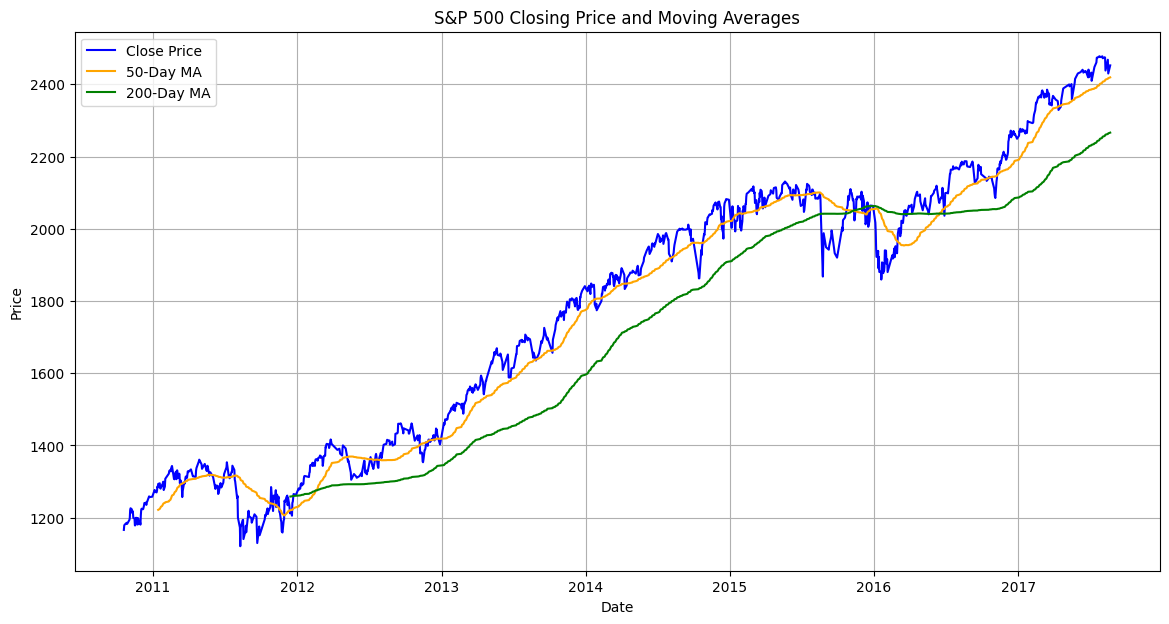

In [7]:
# Traders often use moving averages when analysing the evolution of stock prices. Specifically, the 50-day moving average is the average price over the last 10 trading weeks, making it a commonly used support level. Likewise, the 200-day moving average represents the average price over the past 40 weeks, which is used to suggest a relatively cheap price compared to the price range over most of the past year.

# - Calculate the 50- and 200-day moving average and add the result as new columns in the DataFrame with names `MA50` and `MA200`, respectively.

df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
# - Plot the closing price and the two moving averages in a single plot.
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')
plt.plot(df.index, df['MA50'], label='50-Day MA', color='orange')
plt.plot(df.index, df['MA200'], label='200-Day MA', color='green')
plt.title('S&P 500 Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

- Plot the S&P500 index with both moving averages


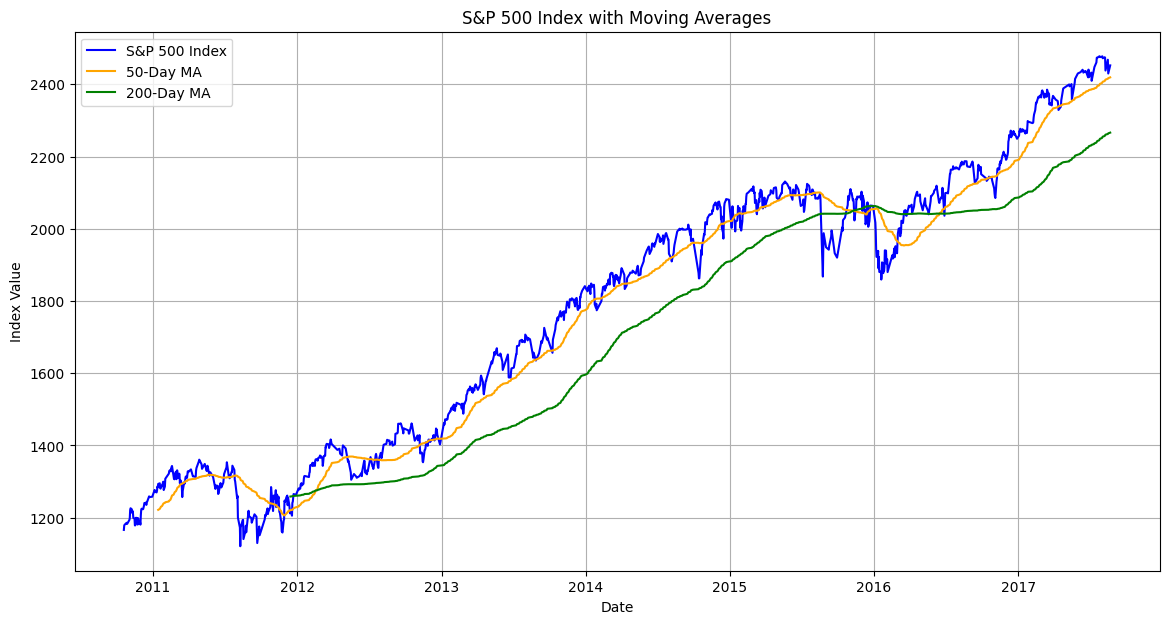

In [8]:
# - Plot the S&P500 index with both moving averages
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='S&P 500 Index', color='blue')
plt.plot(df.index, df['MA50'], label='50-Day MA', color='orange')
plt.plot(df.index, df['MA200'], label='200-Day MA', color='green')
plt.title('S&P 500 Index with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid()
plt.show()


- In August 2011, stock markets across the world [saw a sharp drop in stock prices](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), due to the [European sovereign debt crisis](https://en.wikipedia.org/wiki/European_debt_crisis). Look for that drop in the plot.
- After the 2011 stock markets fall, there are *two* occurrences of a golden cross.
- Both occurrences mark the beginning of long periods with a *bull market* (characterized by rising prices). If possible, identify how long each period lasted, i.e. when does the `MA50` drops below `MA200` again?
- Can you identify occurrences when the `MA200` effectively behaves like a support level?

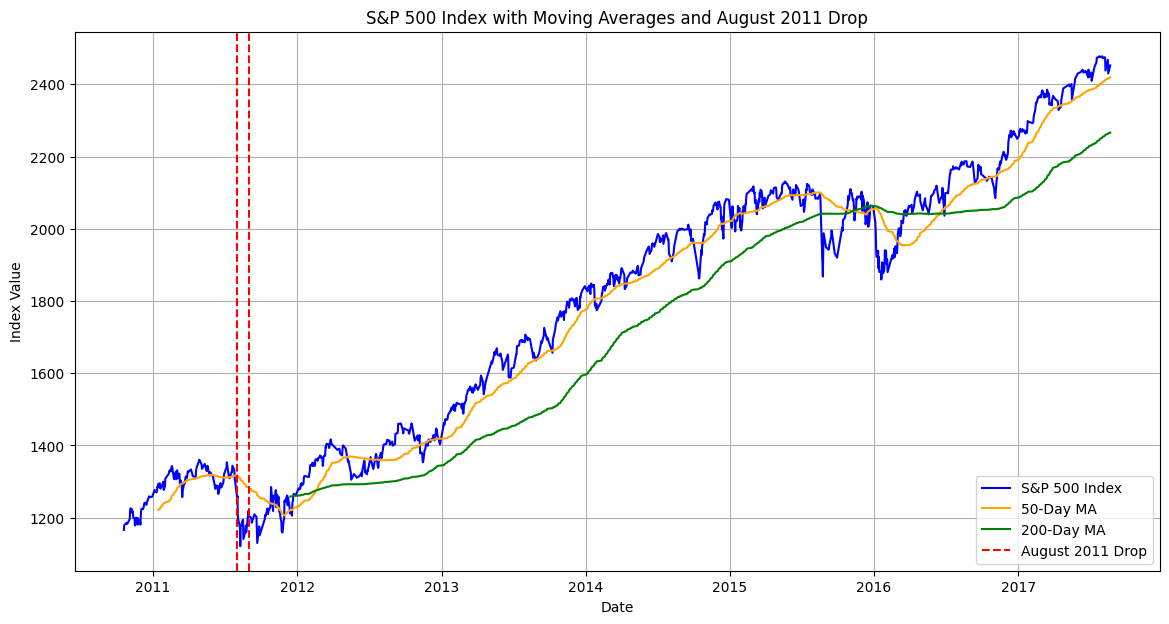

In [10]:

# - In August 2011, stock markets across the world [saw a sharp drop in stock prices](https://en.wikipedia.org/wiki/August_2011_stock_markets_fall), due to the [European sovereign debt crisis](https://en.wikipedia.org/wiki/European_debt_crisis). Look for that drop in the plot.
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='S&P 500 Index', color='blue')
plt.plot(df.index, df['MA50'], label='50-Day MA', color='orange')
plt.plot(df.index, df['MA200'], label='200-Day MA', color='green')
plt.axvline(x=pd.to_datetime('2011-08-01'), color='red', linestyle='--', label='August 2011 Drop')
plt.axvline(x=pd.to_datetime('2011-08-31'), color='red', linestyle='--')
plt.title('S&P 500 Index with Moving Averages and August 2011 Drop')
plt.xlabel('Date')
plt.ylabel('Index Value')
plt.legend()
plt.grid()
plt.show()


# - After the 2011 stock markets fall, there are *two* occurrences of a golden cross.
# A *golden cross* occurs when the 50-day moving average crosses above the 200-day moving average, indicating a potential upward trend in the stock price.

# - Both occurrences mark the beginning of long periods with a *bull market* (characterized by rising prices). If possible, identify how long each period lasted, i.e. when does the `MA50` drops below `MA200` again?
# - The first occurrence of a golden cross is around the end of 2011, and the second occurrence is around the end of 2016.

# - Can you identify occurrences when the `MA200` effectively behaves like a support level?
# - The first golden cross occurred around the end of 2011, and the second around the end of 2016.

## References

Hoseinzade, E., & Haratizadeh, S. (2019-09). *CNNpred: CNN-based stock market prediction using a diverse set of variables.* Expert Systems with Applications, **129,** pp. 273–285. https://doi.org/10.1016/j.eswa.2019.03.029